In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

17164


In [2]:
import cv2

In [8]:
im_folder = r'\\10.245.74.162\ssd_0\MERFISH\MERFISH_analysis\Mecp2_0724_im_temp'
im_filenames = [os.path.join(im_folder, _fl) for _fl in os.listdir(im_folder) if 'im' in _fl and '.npy' in _fl]
print(len(im_filenames))

336


In [9]:
import re
file_result = re.search(r'im_(?P<fov>[0-9]+)_(?P<channel>[0-9]+).npy', im_filenames[0])

In [27]:
sel_fov = 10
ch_2_im = {}
for _fl in im_filenames:
    _result = re.search(r'im_(?P<fov>[0-9]+)_(?P<channel>[0-9]+).npy', _fl)
    if _result is not None and int(_result.groupdict()['fov']) == int(sel_fov):
        ch_2_im[_result.groupdict()['channel']] = np.load(_fl)

In [28]:
# assign images
dapi_im = ch_2_im['405']
mecp2_im = ch_2_im['647']

In [29]:
# import
from cellpose import models

In [30]:
# reshape
test_dapi_im = np.array([cv2.resize(_ly, (1024,1024) ) for _ly in dapi_im])
test_mecp2_im = np.array([cv2.resize(_ly, (1024,1024) ) for _ly in mecp2_im])

In [31]:
%%time
seg_model = models.CellposeModel(gpu=True, model_type='nuclei') # TN2
labels3d, _, _ = seg_model.eval(np.stack([test_dapi_im, test_dapi_im], axis=3), 
                                batch_size=60, anisotropy=1,
                                cellprob_threshold=0, 
                                channels=[0,0], 
                                diameter=40, 
                                min_size=100,
                                do_3D=True,
                                )

CPU times: total: 1min 2s
Wall time: 1min 1s


<IPython.core.display.Javascript object>


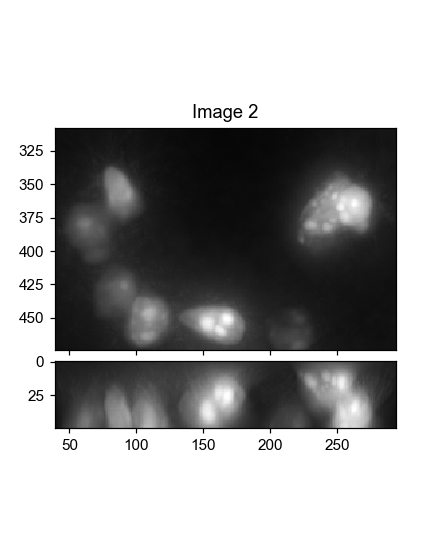

In [32]:
visual_tools.imshow_mark_3d_v2([labels3d, test_dapi_im, test_mecp2_im])

In [6]:
file_result.groupdict()

{'fov': '0', 'channel': '405'}